# Crop Yield Analysis

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions. The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this project the prediction of top 10 most consumed yields all over the world is established by applying machine learning techniques. It consist of 10 most consumed crops.

These corps include :

1. Cassava
2. Maize
3. Plantains and others
4. Potatoes
5. Rice, paddy
7. Sorghum
8. Soybeans
9. Sweet potatoes
10. Wheat
11. Yams

In [29]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
# reading the datasets

df1 = pd.read_csv('pesticides.csv')
df2 = pd.read_csv('rainfall.csv')
df3 = pd.read_csv('yield.csv')

In [31]:
# merging the datasets

data = pd.concat([df1, df2, df3])

# Data Preprocessing

# Pesticides Data:

In [32]:
df1

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [34]:
df1.describe()

,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


# Rainfall Data:

In [35]:
df2

,Area,Year,average_rain_fall_mm_per_year,avg_temp
0,Afghanistan,1985,327,25.58
1,Afghanistan,1986,327,25.52
2,Afghanistan,1987,327,25.67
3,Afghanistan,1989,327,25.92
4,Afghanistan,1990,327,25.46
...,...,...,...,...
6722,Zimbabwe,2013,657,27.48
6723,Zimbabwe,2014,657,27.55
6724,Zimbabwe,2015,657,26.99
6725,Zimbabwe,2016,657,26.98


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  6453 non-null   object 
 3   avg_temp                       6592 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.3+ KB


In [37]:
df2.describe()

,Year,avg_temp
count,6727.000000,6592.000000
mean,2001.354839,17.812200
std,9.530114,7.133866
min,1985.000000,-12.130000
25%,1993.000000,11.690000
50%,2001.000000,18.085000
75%,2010.000000,24.920000
max,2017.000000,28.690000


# Yield Data:

In [38]:
df3

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [40]:
df3.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


# Merged Data:

In [41]:
data.shape

(67793, 14)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67793 entries, 0 to 56716
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain                         61066 non-null  object 
 1   Area                           67793 non-null  object 
 2   Element                        61066 non-null  object 
 3   Item                           61066 non-null  object 
 4   Year                           67793 non-null  int64  
 5   Unit                           61066 non-null  object 
 6   Value                          61066 non-null  float64
 7   average_rain_fall_mm_per_year  6453 non-null   object 
 8   avg_temp                       6592 non-null   float64
 9   Domain Code                    56717 non-null  object 
 10  Area Code                      56717 non-null  float64
 11  Element Code                   56717 non-null  float64
 12  Item Code                      56717 non-null 

In [43]:
data.head(5)

,Domain,Area,Element,Item,Year,Unit,Value,average_rain_fall_mm_per_year,avg_temp,Domain Code,Area Code,Element Code,Item Code,Year Code
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data.tail(5)

,Domain,Area,Element,Item,Year,Unit,Value,average_rain_fall_mm_per_year,avg_temp,Domain Code,Area Code,Element Code,Item Code,Year Code
56712,Crops,Zimbabwe,Yield,Wheat,2012,hg/ha,24420.0,NaN,NaN,QC,181.0,5419.0,15.0,2012.0
56713,Crops,Zimbabwe,Yield,Wheat,2013,hg/ha,22888.0,NaN,NaN,QC,181.0,5419.0,15.0,2013.0
56714,Crops,Zimbabwe,Yield,Wheat,2014,hg/ha,21357.0,NaN,NaN,QC,181.0,5419.0,15.0,2014.0
56715,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,19826.0,NaN,NaN,QC,181.0,5419.0,15.0,2015.0
56716,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,18294.0,NaN,NaN,QC,181.0,5419.0,15.0,2016.0


# To check whether the data is balanced or imbalanced

In [45]:
#count the number of instances of each class label
count=data['Value'].value_counts()

#calculating the percentage of instances for each class label
percentage=count/data.shape[0]*100

#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)

#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")


Class label counts: 
 100000.0    526
10000.0     484
20000.0     377
50000.0     331
40000.0     215
           ... 
169800.0      1
169600.0      1
166332.0      1
167820.0      1
18294.0       1
Name: Value, Length: 39398, dtype: int64
Class label percentages: 
 100000.0    0.775891
10000.0     0.713938
20000.0     0.556105
50000.0     0.488251
40000.0     0.317142
              ...   
169800.0    0.001475
169600.0    0.001475
166332.0    0.001475
167820.0    0.001475
18294.0     0.001475
Name: Value, Length: 39398, dtype: float64
The data is balanced


In [46]:
data.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value',
       'average_rain_fall_mm_per_year', 'avg_temp', 'Domain Code', 'Area Code',
       'Element Code', 'Item Code', 'Year Code'],
      dtype='object')

In [47]:
data=data.rename(columns={'average_rain_fall_mm_per_year':'avg_rainfall_per_year'})

In [48]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(data.dtypes)
Data_dict

,0
Domain,object
Area,object
Element,object
Item,object
Year,int64
Unit,object
Value,float64
avg_rainfall_per_year,object
avg_temp,float64
Domain Code,object


In [49]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = data.isnull().sum()
Data_dict

,0,MissingVal
Domain,object,6727
Area,object,0
Element,object,6727
Item,object,6727
Year,int64,0
Unit,object,6727
Value,float64,6727
avg_rainfall_per_year,object,61340
avg_temp,float64,61201
Domain Code,object,11076


In [50]:
# Identifying unique values 

Data_dict['UniqueVal'] = data.nunique()
Data_dict

,0,MissingVal,UniqueVal
Domain,object,6727,2
Area,object,0,260
Element,object,6727,2
Item,object,6727,11
Year,int64,0,57
Unit,object,6727,2
Value,float64,6727,39398
avg_rainfall_per_year,object,61340,186
avg_temp,float64,61201,2133
Domain Code,object,11076,1


In [51]:
# identifying count of the variable.

Data_dict['Count'] = data.count()
Data_dict

,0,MissingVal,UniqueVal,Count
Domain,object,6727,2,61066
Area,object,0,260,67793
Element,object,6727,2,61066
Item,object,6727,11,61066
Year,int64,0,57,67793
Unit,object,6727,2,61066
Value,float64,6727,39398,61066
avg_rainfall_per_year,object,61340,186,6453
avg_temp,float64,61201,2133,6592
Domain Code,object,11076,1,56717


In [52]:
data.describe()

,Year,Value,avg_temp,Area Code,Element Code,Item Code,Year Code
count,67793.000000,6.106600e+04,6592.000000,56717.000000,56717.0,56717.000000,56717.000000
mean,1991.693154,5.911836e+04,17.812200,125.650422,5419.0,111.611651,1989.669570
std,15.864726,7.332469e+04,7.133866,75.120195,0.0,101.278435,16.133198
min,1961.000000,0.000000e+00,-12.130000,1.000000,5419.0,15.000000,1961.000000
25%,1979.000000,1.328475e+04,11.690000,58.000000,5419.0,56.000000,1976.000000
50%,1994.000000,3.297600e+04,18.085000,122.000000,5419.0,116.000000,1991.000000
75%,2005.000000,8.047200e+04,24.920000,184.000000,5419.0,125.000000,2004.000000
max,2017.000000,1.807000e+06,28.690000,351.000000,5419.0,489.000000,2016.000000


In [53]:
# grouping based on Item

data.groupby('Item').count()

,Domain,Area,Element,Year,Unit,Value,avg_rainfall_per_year,avg_temp,Domain Code,Area Code,Element Code,Item Code,Year Code
Item,,,,,,,,,,,,,
Cassava,5718,5718,5718,5718,5718,5718,0,0,5718,5718,5718,5718,5718
Maize,8631,8631,8631,8631,8631,8631,0,0,8631,8631,8631,8631,8631
Pesticides (total),4349,4349,4349,4349,4349,4349,0,0,0,0,0,0,0
Plantains and others,2654,2654,2654,2654,2654,2654,0,0,2654,2654,2654,2654,2654
Potatoes,7876,7876,7876,7876,7876,7876,0,0,7876,7876,7876,7876,7876
"Rice, paddy",6469,6469,6469,6469,6469,6469,0,0,6469,6469,6469,6469,6469
Sorghum,5511,5511,5511,5511,5511,5511,0,0,5511,5511,5511,5511,5511
Soybeans,4192,4192,4192,4192,4192,4192,0,0,4192,4192,4192,4192,4192
Sweet potatoes,6356,6356,6356,6356,6356,6356,0,0,6356,6356,6356,6356,6356


# Outliers

In [54]:
# Calculate Z-scores for each column

z_scores = (data - data.mean()) / data.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Find total number of outliers for each column 
col_outliers = outliers.sum(axis=0)

print("Outliers per column:")
for col in data.columns:
    print(f"{col}: {col_outliers[col]}")

Outliers per column:
Domain: 0
Area: 0
Element: 0
Item: 0
Year: 0
Unit: 0
Value: 1020
avg_rainfall_per_year: 0
avg_temp: 3
Domain Code: 0
Area Code: 0
Element Code: 0
Item Code: 2654
Year Code: 0


In [55]:
# Calculate Z-scores for each column
z_scores = (data - data.mean()) / data.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Replace outliers with NaN
data[outliers] = np.nan

# Replace NaN with median value of each column
median_vals = data.median()
data = data.fillna(median_vals)

# Find total number of replaced outliers for each column 
col_replaced = outliers.sum(axis=0)

print("Replaced outliers per column:")
for col in data.columns:
    print(f"{col}: {col_replaced[col]}")


Replaced outliers per column:
Domain: 0
Area: 0
Element: 0
Item: 0
Year: 0
Unit: 0
Value: 1020
avg_rainfall_per_year: 0
avg_temp: 3
Domain Code: 0
Area Code: 0
Element Code: 0
Item Code: 2654
Year Code: 0


# Missing Values

In [56]:
data.isnull().sum().sort_values(ascending=True)      

Area                         0
Year                         0
Value                        0
avg_temp                     0
Area Code                    0
Element Code                 0
Item Code                    0
Year Code                    0
Domain                    6727
Element                   6727
Item                      6727
Unit                      6727
Domain Code              11076
avg_rainfall_per_year    61340
dtype: int64

In [57]:
# Identify columns with missing values in data2014
missing_cols = data.columns[data.isnull().any()].tolist()

# Fill missing values with mean value for numerical columns and mode value for categorical columns
for col in missing_cols:
    if data[col].dtype == np.number:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if there are any missing values left
print(data.isnull().sum().sum())

0


# Conversion

In [58]:
# Numerical Columns
num_attr = data.select_dtypes(['float']).columns  
num_attr

Index(['Value', 'avg_temp', 'Area Code', 'Element Code', 'Item Code',
       'Year Code'],
      dtype='object')

In [59]:
# Categorical Columns
cat_attr = data.select_dtypes('object').columns
cat_attr

Index(['Domain', 'Area', 'Element', 'Item', 'Unit', 'avg_rainfall_per_year',
       'Domain Code'],
      dtype='object')

In [60]:
data["Domain"].unique()

array(['Pesticides Use', 'Crops'], dtype=object)

In [61]:
data["Item"].unique()

array(['Pesticides (total)', 'Maize', 'Potatoes', 'Rice, paddy', 'Wheat',
       'Sorghum', 'Soybeans', 'Cassava', 'Yams', 'Sweet potatoes',
       'Plantains and others'], dtype=object)

In [62]:
data["Element"].unique()

array(['Use', 'Yield'], dtype=object)

In [63]:
data["Unit"].unique()

array(['tonnes of active ingredients', 'hg/ha'], dtype=object)

In [64]:
data["Domain Code"].unique()

array(['QC'], dtype=object)

In [65]:
data

,Domain,Area,Element,Item,Year,Unit,Value,avg_rainfall_per_year,avg_temp,Domain Code,Area Code,Element Code,Item Code,Year Code
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0,1500,18.1,QC,122.0,5419.0,116.0,1991.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0,1500,18.1,QC,122.0,5419.0,116.0,1991.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0,1500,18.1,QC,122.0,5419.0,116.0,1991.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0,1500,18.1,QC,122.0,5419.0,116.0,1991.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0,1500,18.1,QC,122.0,5419.0,116.0,1991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56712,Crops,Zimbabwe,Yield,Wheat,2012,hg/ha,24420.0,1500,18.1,QC,181.0,5419.0,15.0,2012.0
56713,Crops,Zimbabwe,Yield,Wheat,2013,hg/ha,22888.0,1500,18.1,QC,181.0,5419.0,15.0,2013.0
56714,Crops,Zimbabwe,Yield,Wheat,2014,hg/ha,21357.0,1500,18.1,QC,181.0,5419.0,15.0,2014.0
56715,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,19826.0,1500,18.1,QC,181.0,5419.0,15.0,2015.0


In [66]:
from sklearn.preprocessing import LabelEncoder

# create LabelEncoder object
le = LabelEncoder()
new_data = data.copy()

# fit and transform the Domain column
new_data['Domain'] = le.fit_transform(new_data['Domain'])

# fit and transform the Element column
new_data['Element'] = le.fit_transform(new_data['Element'])

In [67]:
# Perform dummy encoding on 'Embarked' column
dummy_encoded = pd.get_dummies(data['Item'], prefix='Item', drop_first=True)

# Add the new dummy encoded columns to the dataset
new_data = pd.concat([data, dummy_encoded], axis=1)

In [68]:
# get a list of the categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# perform label encoding
for col in cat_cols:
    new_data[col] = pd.factorize(data[col])[0]
new_data

,Domain,Area,Element,Item,Year,Unit,Value,avg_rainfall_per_year,avg_temp,Domain Code,...,Item_Maize,Item_Pesticides (total),Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,0,0,0,1990,0,121.0,0,18.1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1991,0,121.0,0,18.1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1992,0,121.0,0,18.1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1993,0,121.0,0,18.1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1994,0,201.0,0,18.1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56712,1,70,1,4,2012,1,24420.0,0,18.1,0,...,0,0,0,0,0,0,0,0,1,0
56713,1,70,1,4,2013,1,22888.0,0,18.1,0,...,0,0,0,0,0,0,0,0,1,0
56714,1,70,1,4,2014,1,21357.0,0,18.1,0,...,0,0,0,0,0,0,0,0,1,0
56715,1,70,1,4,2015,1,19826.0,0,18.1,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
new_data.dtypes

Domain                         int64
Area                           int64
Element                        int64
Item                           int64
Year                           int64
Unit                           int64
Value                        float64
avg_rainfall_per_year          int64
avg_temp                     float64
Domain Code                    int64
Area Code                    float64
Element Code                 float64
Item Code                    float64
Year Code                    float64
Item_Maize                     uint8
Item_Pesticides (total)        uint8
Item_Plantains and others      uint8
Item_Potatoes                  uint8
Item_Rice, paddy               uint8
Item_Sorghum                   uint8
Item_Soybeans                  uint8
Item_Sweet potatoes            uint8
Item_Wheat                     uint8
Item_Yams                      uint8
dtype: object

In [70]:
new_data= new_data.astype('float64')

In [71]:
new_data.dtypes

Domain                       float64
Area                         float64
Element                      float64
Item                         float64
Year                         float64
Unit                         float64
Value                        float64
avg_rainfall_per_year        float64
avg_temp                     float64
Domain Code                  float64
Area Code                    float64
Element Code                 float64
Item Code                    float64
Year Code                    float64
Item_Maize                   float64
Item_Pesticides (total)      float64
Item_Plantains and others    float64
Item_Potatoes                float64
Item_Rice, paddy             float64
Item_Sorghum                 float64
Item_Soybeans                float64
Item_Sweet potatoes          float64
Item_Wheat                   float64
Item_Yams                    float64
dtype: object

# Data Visualization

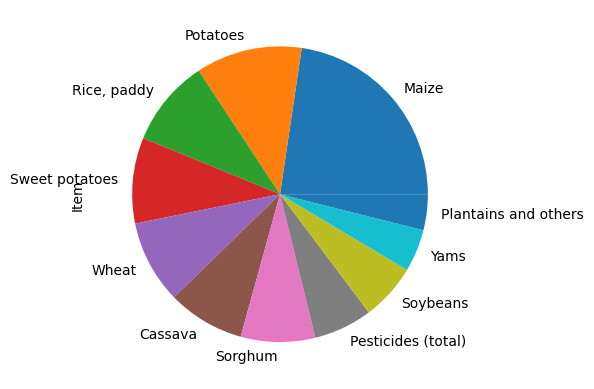

In [87]:
data['Item'].value_counts()[:11].plot(kind='pie')
plt.show()

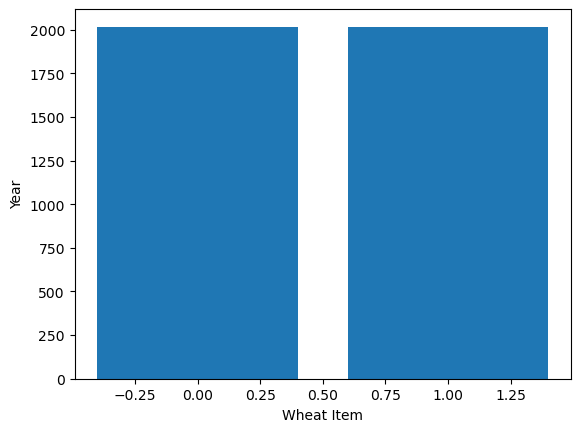

In [88]:
plt.bar(new_data['Item_Wheat'], new_data['Year'])
plt.xlabel('Wheat Item')
plt.ylabel('Year')
plt.show()

In [74]:
new_data.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value',
       'avg_rainfall_per_year', 'avg_temp', 'Domain Code', 'Area Code',
       'Element Code', 'Item Code', 'Year Code', 'Item_Maize',
       'Item_Pesticides (total)', 'Item_Plantains and others', 'Item_Potatoes',
       'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object')

ValueError: num must be 1 <= num <= 14, not 15

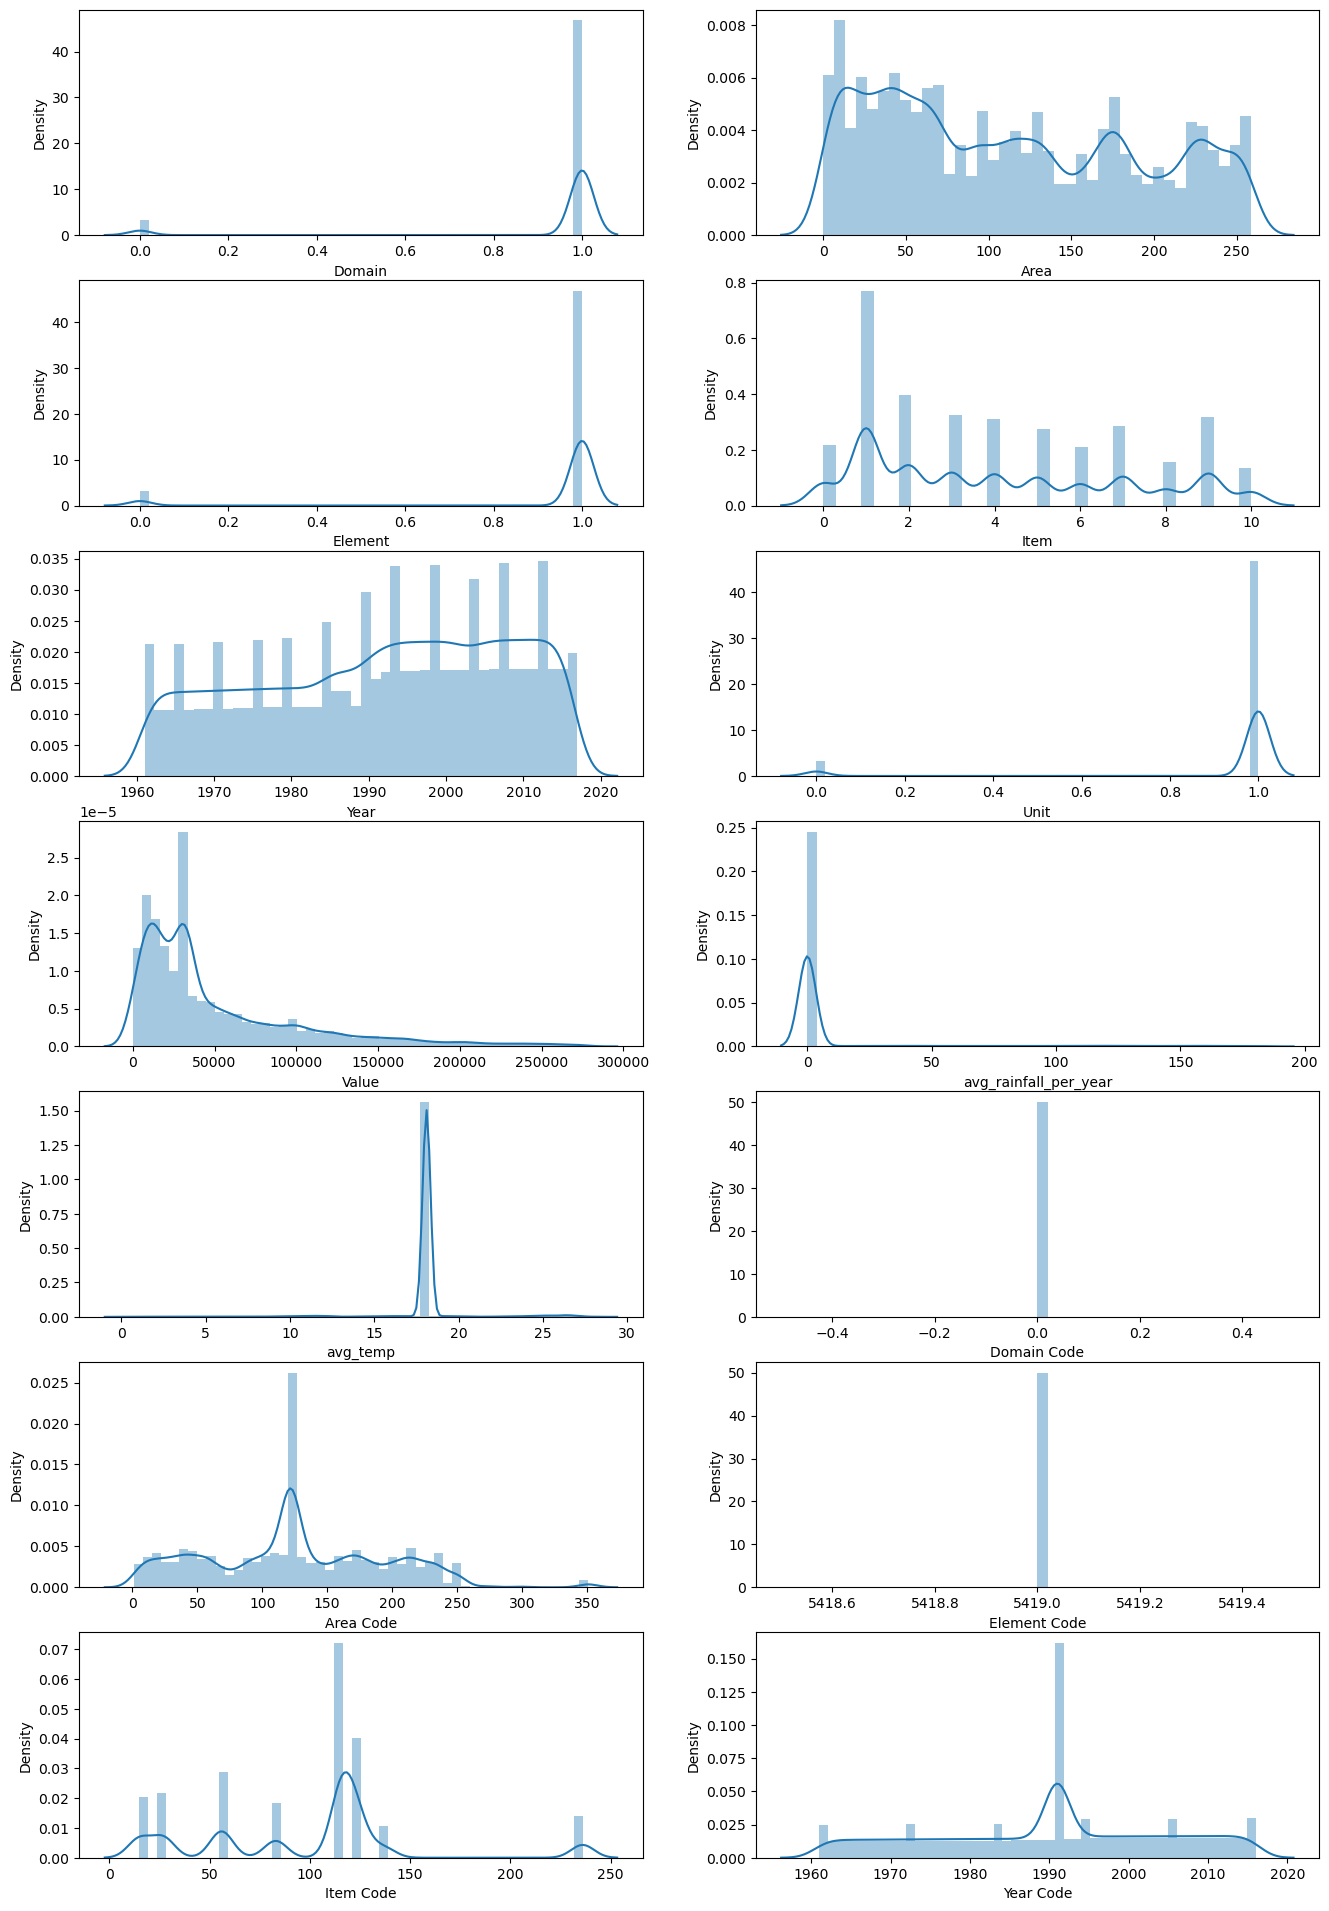

In [76]:
# Lets look at the distribution plot of the features
temp_data = new_data.apply(pd.to_numeric, errors='coerce')
    
fig = plt.figure(figsize=(16,24))
pos = 1
for i in temp_data.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1 
    sns.distplot(temp_data[i],ax=ax)


1.7668426748875241


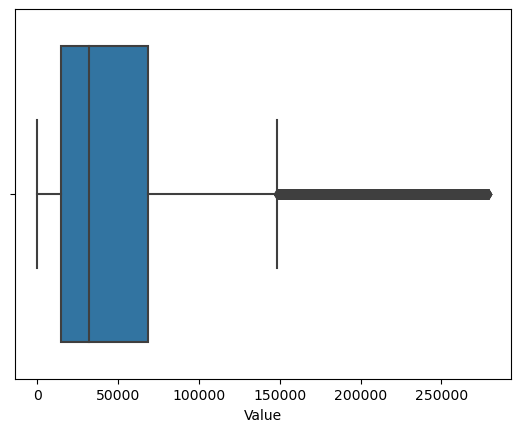

In [77]:
sns.boxplot(data["Value"])
print(data['Value'].skew())

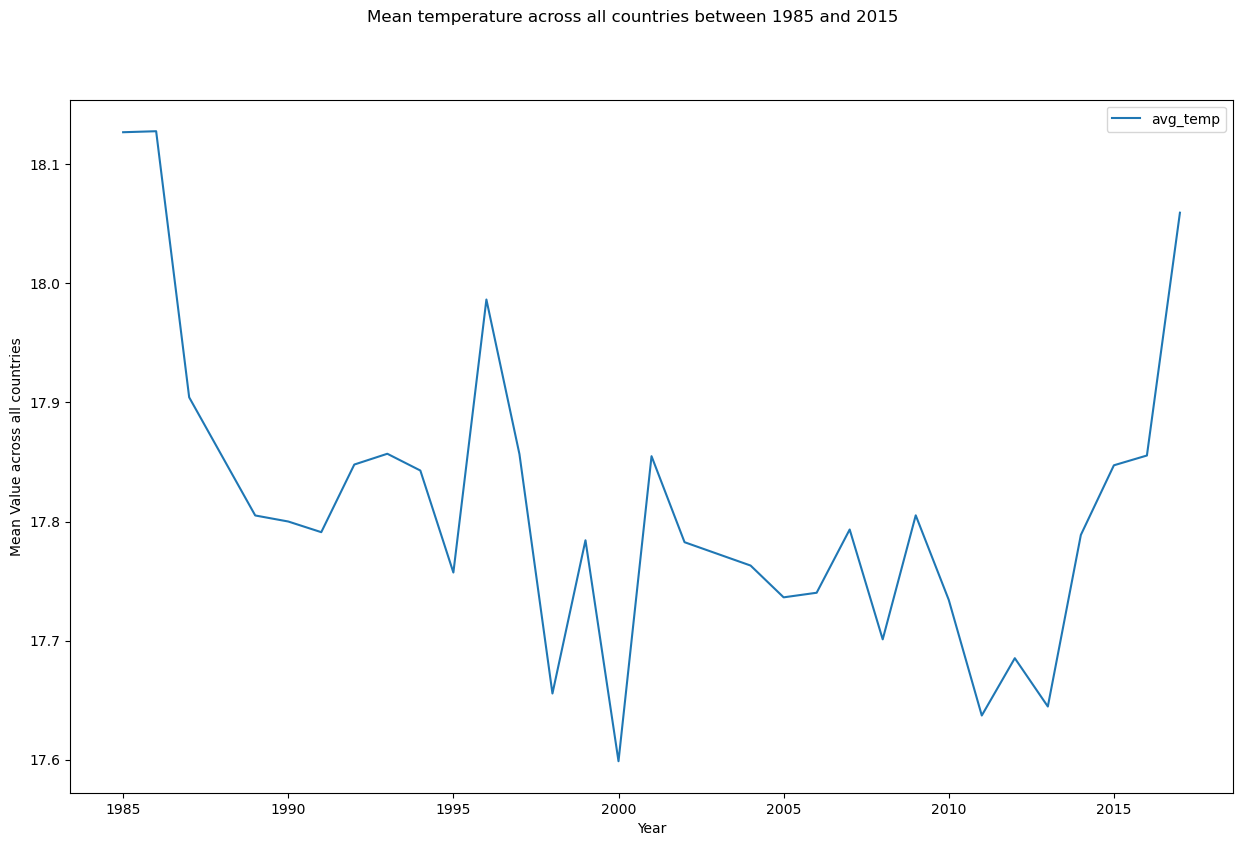

In [78]:
# prepare data
temp_data = df2.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature across all countries between 1985 and 2015')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

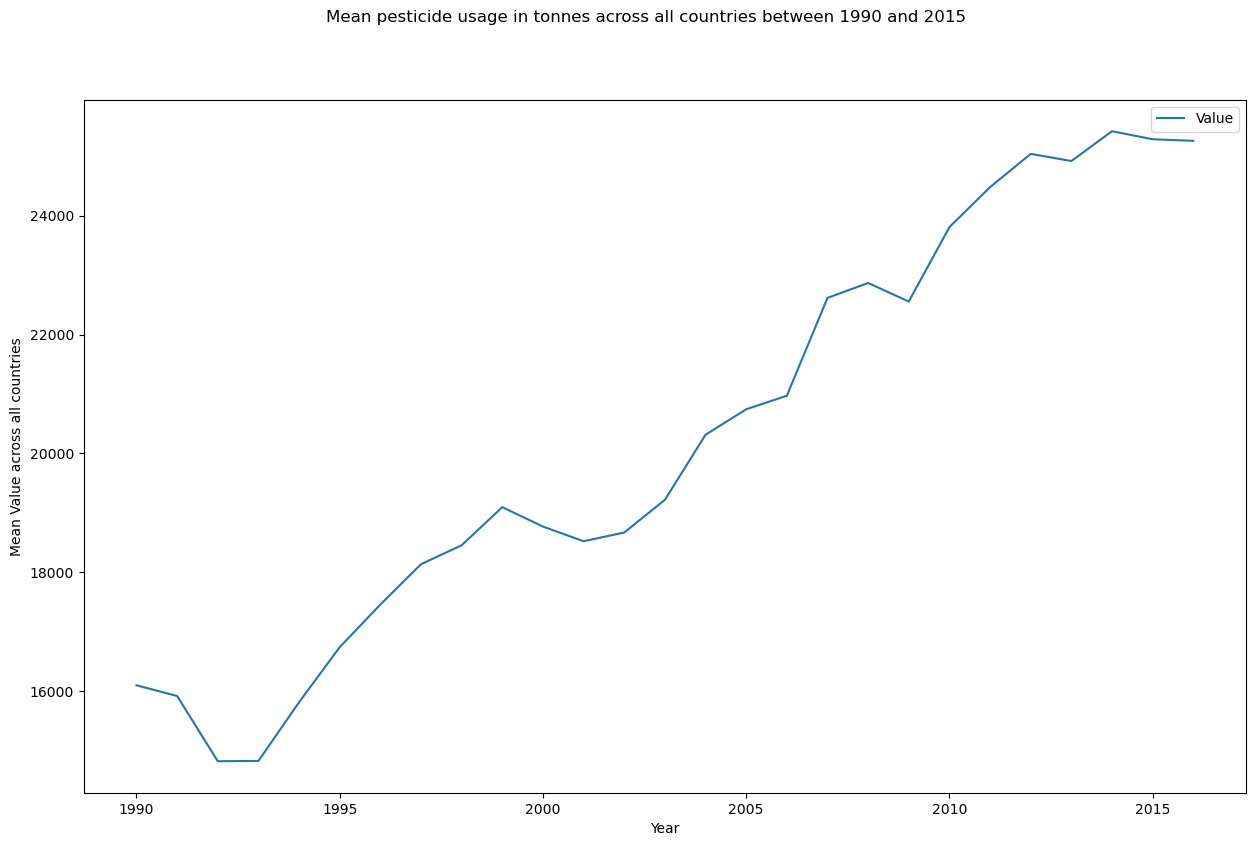

In [84]:
# prepare data
temp_data = df1.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2015')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

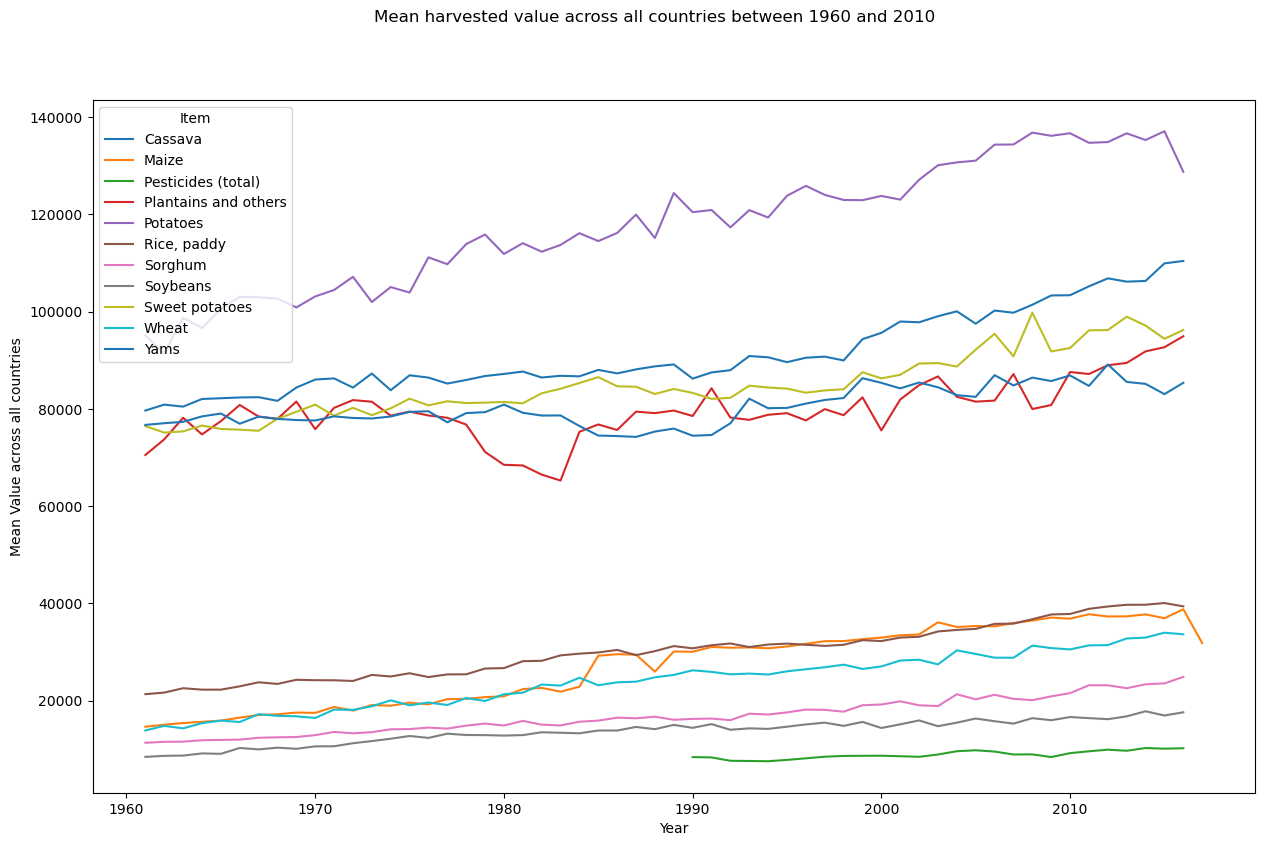

In [80]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1960 and 2010')

temp_data['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()
     

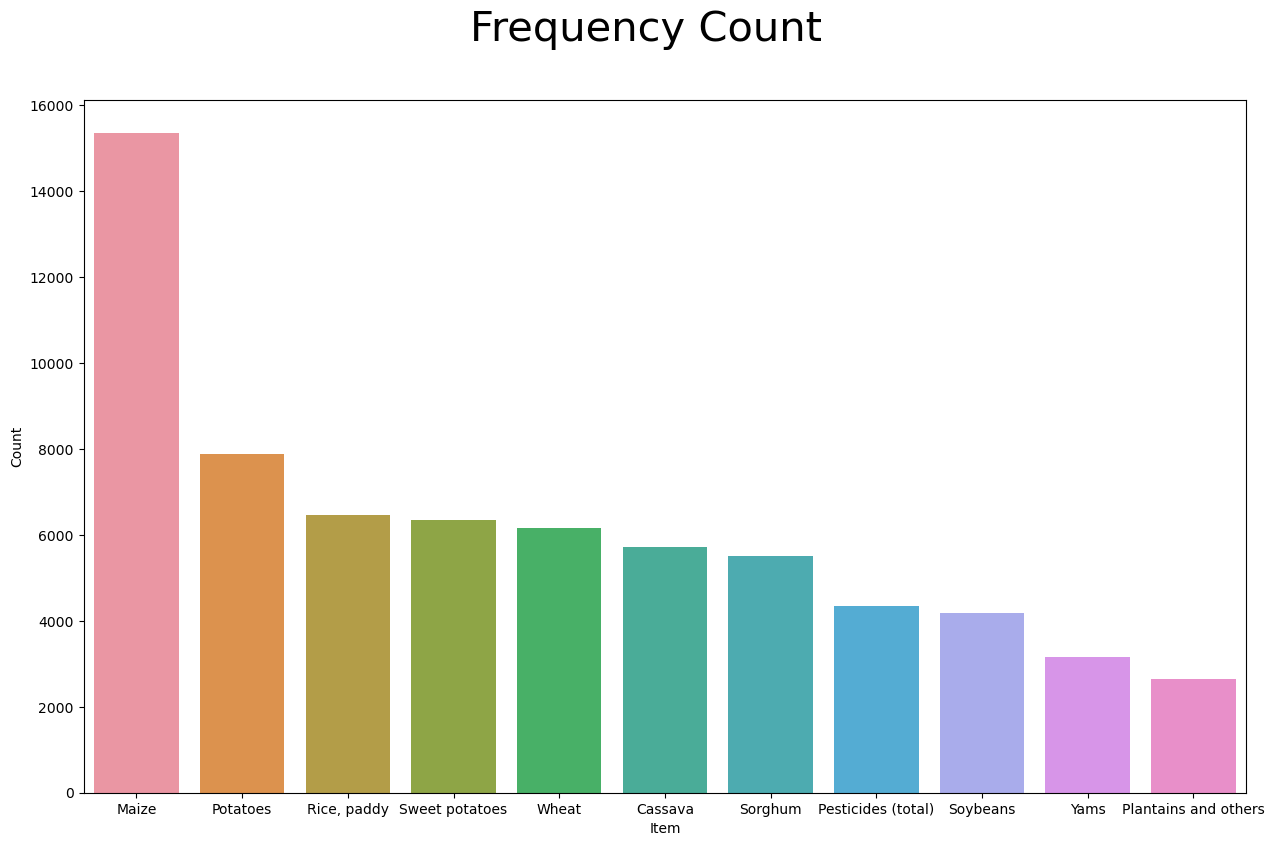

In [81]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_data = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_data, orient='v', ax=axs)

for index, row in data.iterrows():
    try:
        g.text(row.name, str(int(row.Item) + 100), row.Item, color='black', ha="center")
    except ValueError:
        continue

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

<AxesSubplot:>

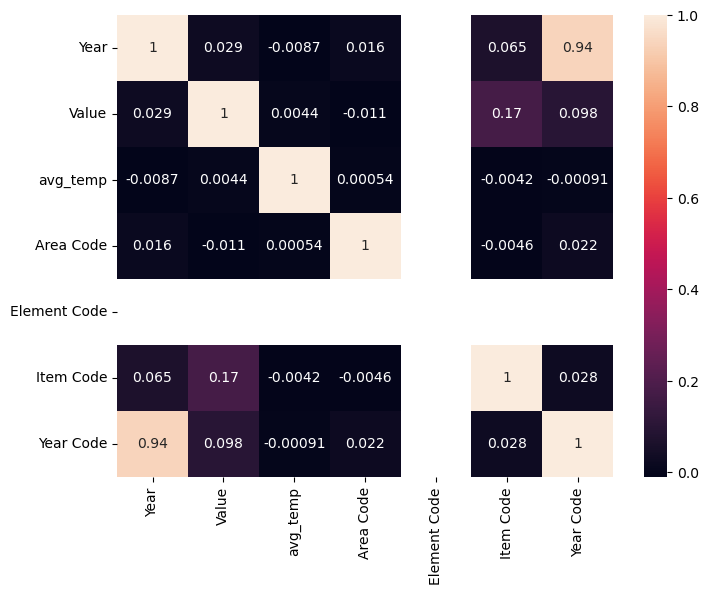

In [82]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(data.corr(),annot=True)